# Twitter Sentiment Analysis

#### Step 1 - Loading Training and Validation dataset

In [133]:
# Load Dataset - Training and Validation

# Column Names
label_array = ['Tweet_ID','entity','sentiment','Tweet_content']

# Load csv files
data_train = pd.read_csv('twitter_training.csv', header=None, names=label_array)
data_valid = pd.read_csv('twitter_validation.csv', header=None, names=label_array)


In [134]:
# Display loaded dataset - Training and Validation dataset

data_train.head() # Display loaded training dataset

,Tweet_ID,entity,sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [135]:
data_valid.head() # Display loaded validation dataset

,Tweet_ID,entity,sentiment,Tweet_content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [136]:
# Display Dataset information - Training and Validation dataset

print('Training Dataset Information:\n')
data_train.info()

print('\n\nValidation Dataset Information:\n')
data_valid.info()

print("\n\nTraing Dataset shape: ",data_train.shape) # 74682 entries
print("Validation Dataset Shape: ", data_valid.shape) # 1000 entries


Training Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


Validation Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       1000 non-null   int64 
 1   entity         1000 non-null   object
 2   sentiment      1000 non-null   object
 3   Tweet_content  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


Traing Dataset shape:  (74682, 4)
Validation Dataset Shape:  (1000, 4)


#### Training Data and Validation Data - 

##### Both Dataset has 4 Columns.
 * Integer datatype column(Tweet_ID)  
 * object datatype column (entity, sentiment, Tweet_content)

##### Training Dataset with 74682 entries & Validation Dataset with 1000 entries.

#### Step 2 - Data Preprocessing

In [137]:
# Check for missing values/ NA - Training and Validation dataset

missing_train = data_train.isnull().sum()
missing_valid = data_valid.isnull().sum()

print("Missing values per column - Training Data:\n", missing_train)
print("\nMissing values per column - Validation Data:\n", missing_valid)


Missing values per column - Training Data:
 Tweet_ID           0
entity             0
sentiment          0
Tweet_content    686
dtype: int64

Missing values per column - Validation Data:
 Tweet_ID         0
entity           0
sentiment        0
Tweet_content    0
dtype: int64


In [138]:
# Check for duplicate rows - Training and Validation dataset

duplicates_train = data_train.duplicated().sum()
duplicates_valid = data_valid.duplicated().sum()

print("Duplicate Rows in Training Data:", duplicates_train)
print("Duplicate Rows in Validation Data:", duplicates_valid)


Duplicate Rows in Training Data: 2700
Duplicate Rows in Validation Data: 0



#### Missing/ Null Values - 
##### * Training Dataset, has 686 missing/ null values in Tweet_content column.
##### * Validation Dataset, has 0 missing/ null values in Tweet_content column.

#### Duplicate Values -
##### * Training Dataset, has 2700 duplicate rows.
##### * Validation Dataset, has 0 duplicate rows.

In [139]:
# Drop Duplicate rows - Training dataset

data_train = data_train.drop_duplicates()

# Display after duplicate is deleted
duplicates_train_1 = data_train.duplicated().sum() 
print("Duplicate Rows in Training Data: ", duplicates_train_1)


Duplicate Rows in Training Data:  0


#### Handling Missing Values

In [140]:
# Display Missing/ null values in Tweet_count column after deleting duplicate rows

print("Training dataset Missing Value counts -\n\n",data_train.isna().sum())
print("\n\n Training dataset with null values - \n\n", data_train[data_train['Tweet_content'].isnull()].head())

Training dataset Missing Value counts -

 Tweet_ID           0
entity             0
sentiment          0
Tweet_content    326
dtype: int64


 Training dataset with null values - 

       Tweet_ID       entity sentiment Tweet_content
61        2411  Borderlands   Neutral           NaN
553       2496  Borderlands   Neutral           NaN
589       2503  Borderlands   Neutral           NaN
745       2532  Borderlands  Positive           NaN
1105      2595  Borderlands  Positive           NaN


In [141]:
# Drop rows with missing/ null values in Tweet_content column

data_train = data_train.dropna(axis=0, how='any')
data_train.isna().sum() # 0 Missing values

Tweet_ID         0
entity           0
sentiment        0
Tweet_content    0
dtype: int64

#### Target Label Details

In [142]:
# Display Unique Sentiments and their count

print(data_train['sentiment'].value_counts())

sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64


#### Sentiment Column - 

##### - There are 4 unique sentiments: Positive, Negative, Neutral, and Irrelevant
##### - The "Irrelevant" sentiment does not add value to the dataset, so it will be reassigned to "Neutral"

#### Replacing 'Irrelevant' sentiment to 'Nuetral'

In [143]:
data_train['sentiment'] = data_train['sentiment'].replace({"Irrelevant": "Neutral"})
data_valid['sentiment'] = data_valid['sentiment'].replace({"Irrelevant": "Neutral"})

# Display Unique Sentiments and their count

print("Traing Dataset unique sentiment count - \n\n", data_train['sentiment'].value_counts())
print("\nValidation Dataset unique sentiment count - \n\n", data_valid['sentiment'].value_counts())


Traing Dataset unique sentiment count - 

 sentiment
Neutral     30245
Negative    21698
Positive    19713
Name: count, dtype: int64

Validation Dataset unique sentiment count - 

 sentiment
Neutral     457
Positive    277
Negative    266
Name: count, dtype: int64


## EDA - visualization

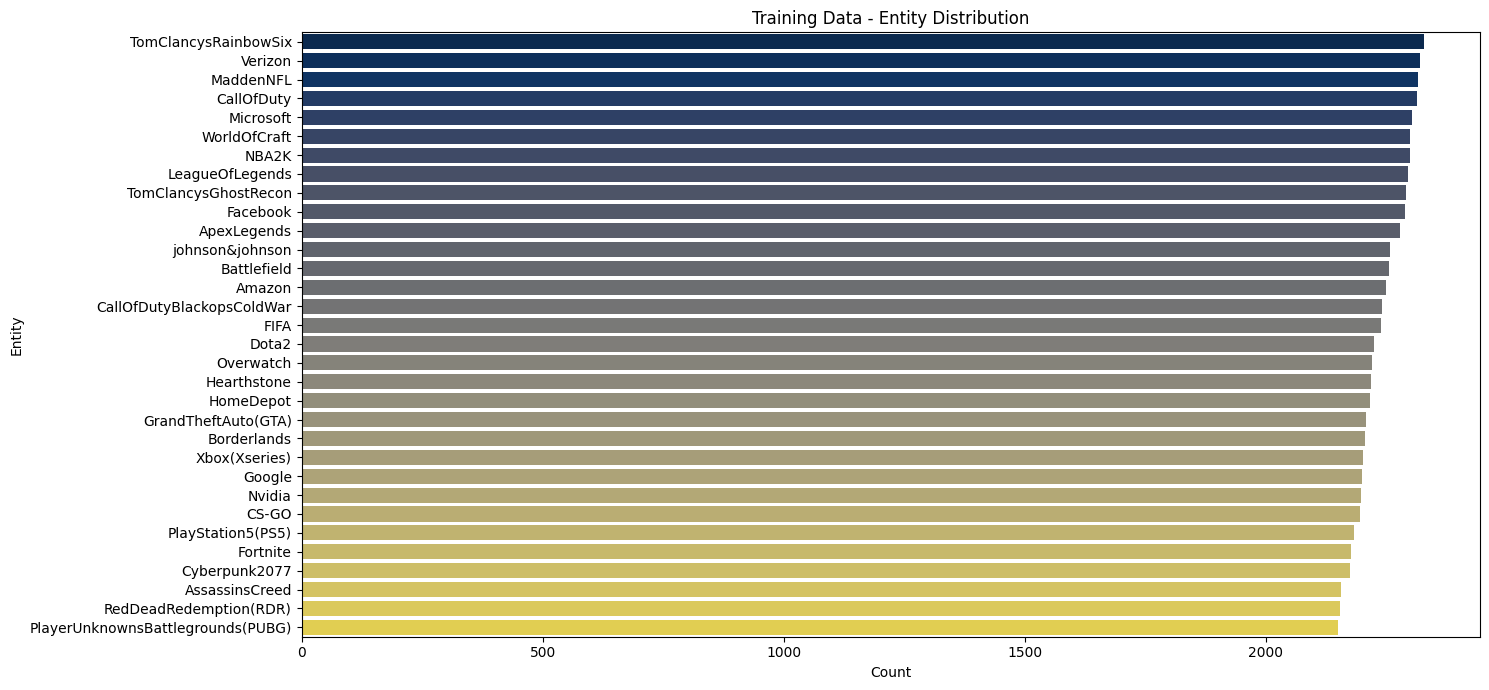

In [144]:
# Entity Distribution - Training Dataset
plt.figure(figsize=(15, 7))

# Plot entity distribution for training data
sns.countplot(data=data_train, y=data_train.columns[1], order=data_train[data_train.columns[1]].value_counts().index, palette='cividis')

plt.title('Training Data - Entity Distribution')
plt.xlabel('Count')
plt.ylabel('Entity')

plt.tight_layout()
plt.show()


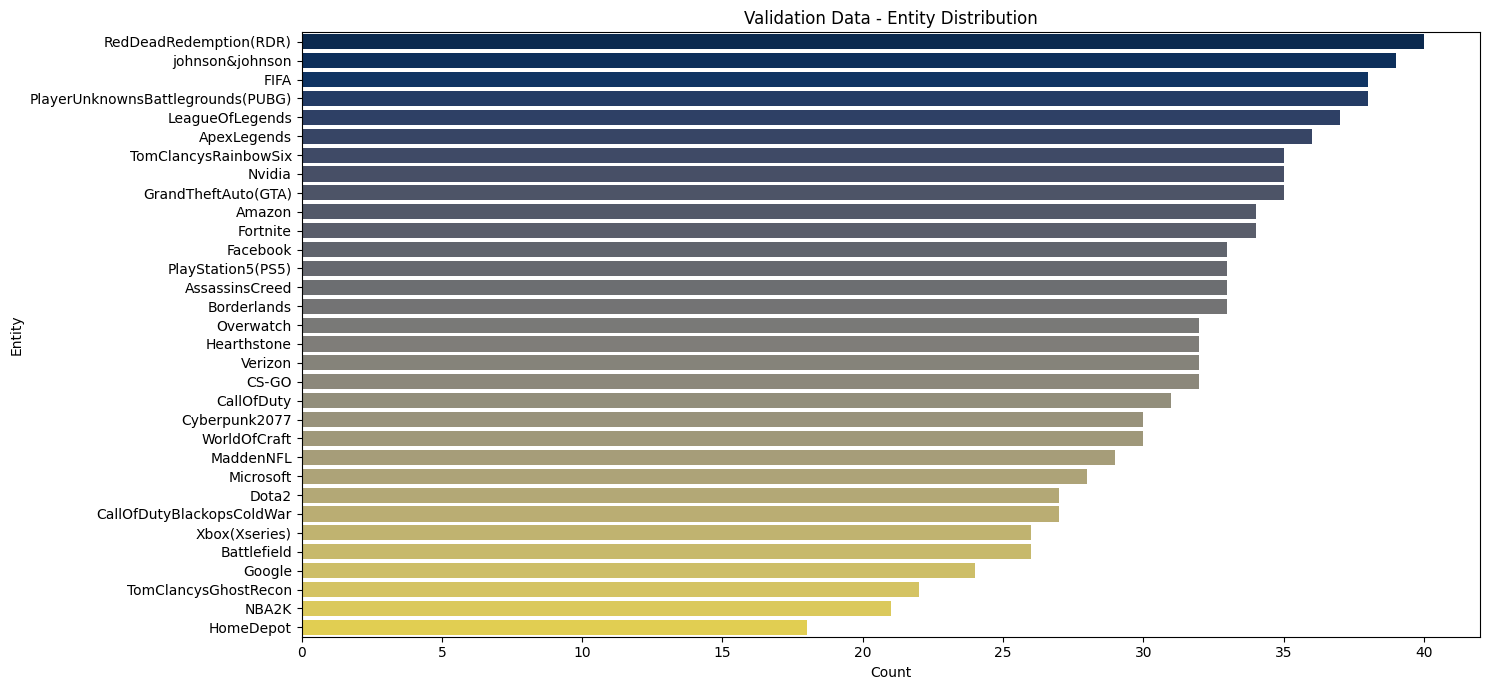

In [145]:
# Entity Distribution - Validation Dataset
plt.figure(figsize=(15, 7))

# Plot entity distribution for training data
sns.countplot(data=data_valid, y=data_valid.columns[1], order=data_valid[data_valid.columns[1]].value_counts().index, palette='cividis')

plt.title('Validation Data - Entity Distribution')
plt.xlabel('Count')
plt.ylabel('Entity')

plt.tight_layout()
plt.show()


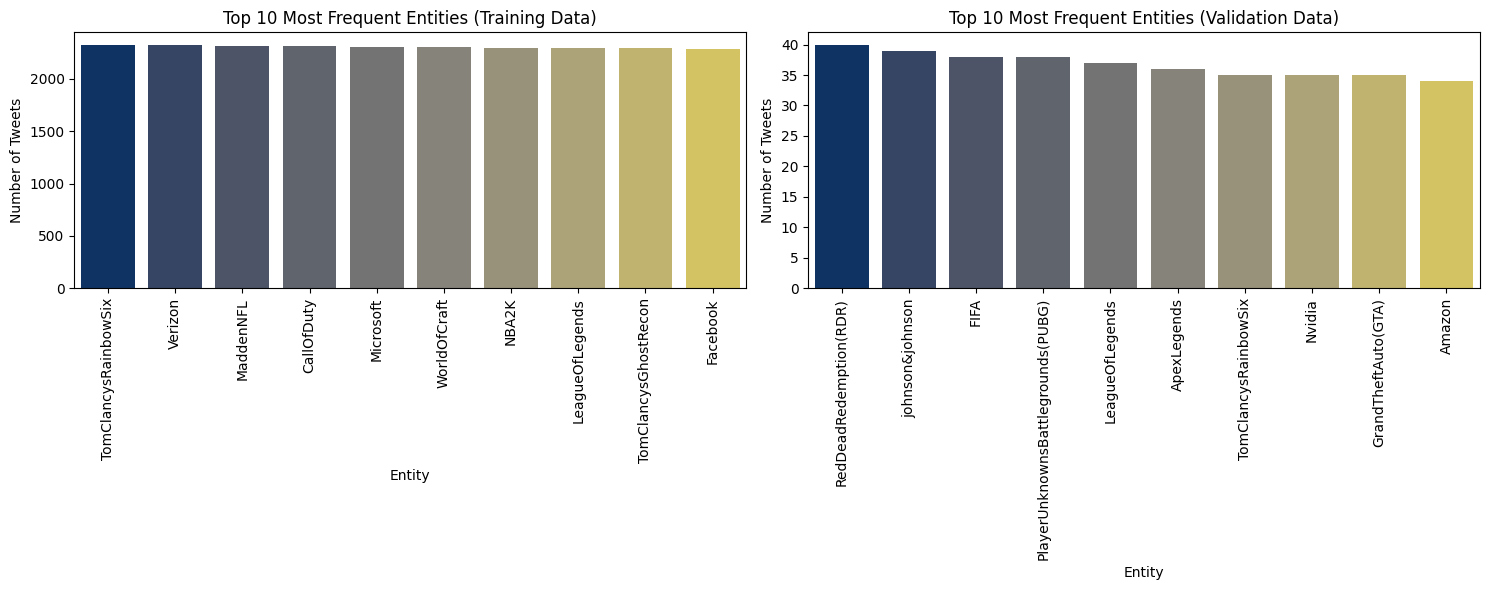

In [146]:
# Top 10 Entity Distribution - Training and Validation dataset

entity_counts_train = data_train['entity'].value_counts()
entity_counts_valid = data_valid['entity'].value_counts()

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot for Training dataset - Top 10 entities
sns.barplot(x=entity_counts_train.index[:10], y=entity_counts_train.values[:10], palette="cividis", ax=axes[0])

axes[0].set_xticklabels(entity_counts_train.index[:10], rotation=90)
axes[0].set_xlabel("Entity")
axes[0].set_ylabel("Number of Tweets")
axes[0].set_title("Top 10 Most Frequent Entities (Training Data)")

# Bar plot for Validation dataset - Top 10 entities
sns.barplot(x=entity_counts_valid.index[:10], y=entity_counts_valid.values[:10], palette="cividis", ax=axes[1])

axes[1].set_xticklabels(entity_counts_valid.index[:10], rotation=90)
axes[1].set_xlabel("Entity")
axes[1].set_ylabel("Number of Tweets")
axes[1].set_title("Top 10 Most Frequent Entities (Validation Data)")

# Show the plots
plt.tight_layout()
plt.show()

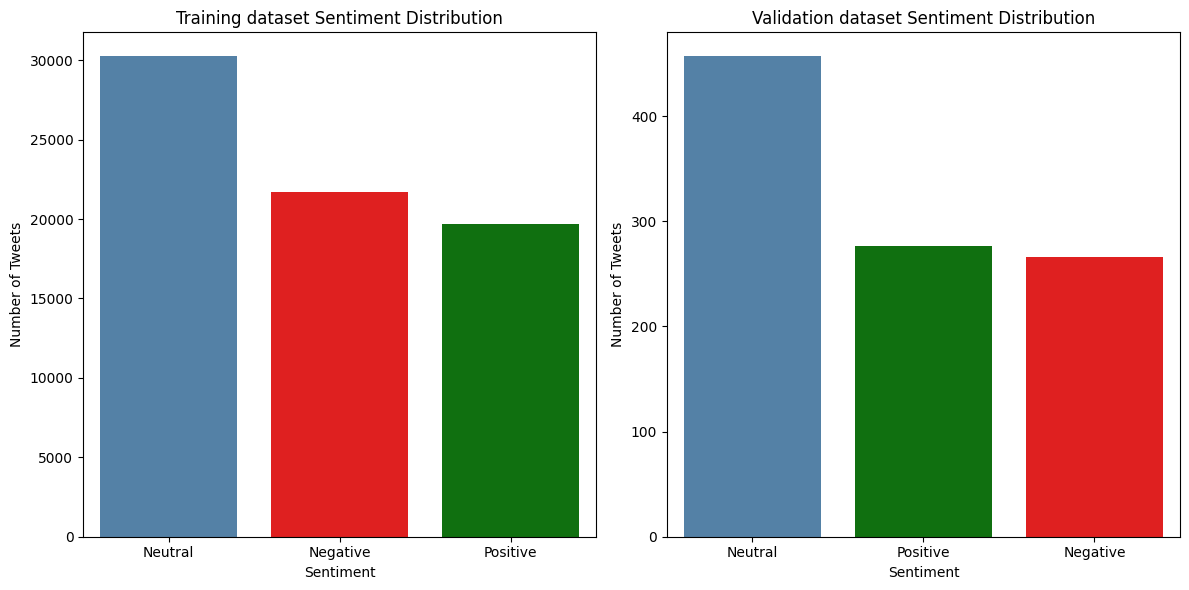

In [147]:
# Sentiment distribution - Training and Validation dataset

# Sentiment Count 
sentiment_counts_train = data_train['sentiment'].value_counts() # Training Dataset
sentiment_counts_valid = data_valid['sentiment'].value_counts() # Validation dataset

# Define sentiment labels
sentiment_labels = {1: "Negative", 2: "Neutral", 3: "Positive"}

# Define custom colors for each sentiment
sentiment_colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'steelblue'}

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First plot - Training dataset
sns.barplot(x=sentiment_counts_train.index, y=sentiment_counts_train.values, ax=axes[0], palette=sentiment_colors)

axes[0].set_title("Training dataset Sentiment Distribution")
axes[0].set_xlabel("Sentiment")
axes[0].set_ylabel("Number of Tweets")

# Second plot - Validation dataset
sns.barplot(x=sentiment_counts_valid.index, y=sentiment_counts_valid.values, ax=axes[1], palette=sentiment_colors)

axes[1].set_title("Validation dataset Sentiment Distribution")
axes[1].set_xlabel("Sentiment")
axes[1].set_ylabel("Number of Tweets")


plt.tight_layout()
plt.show()

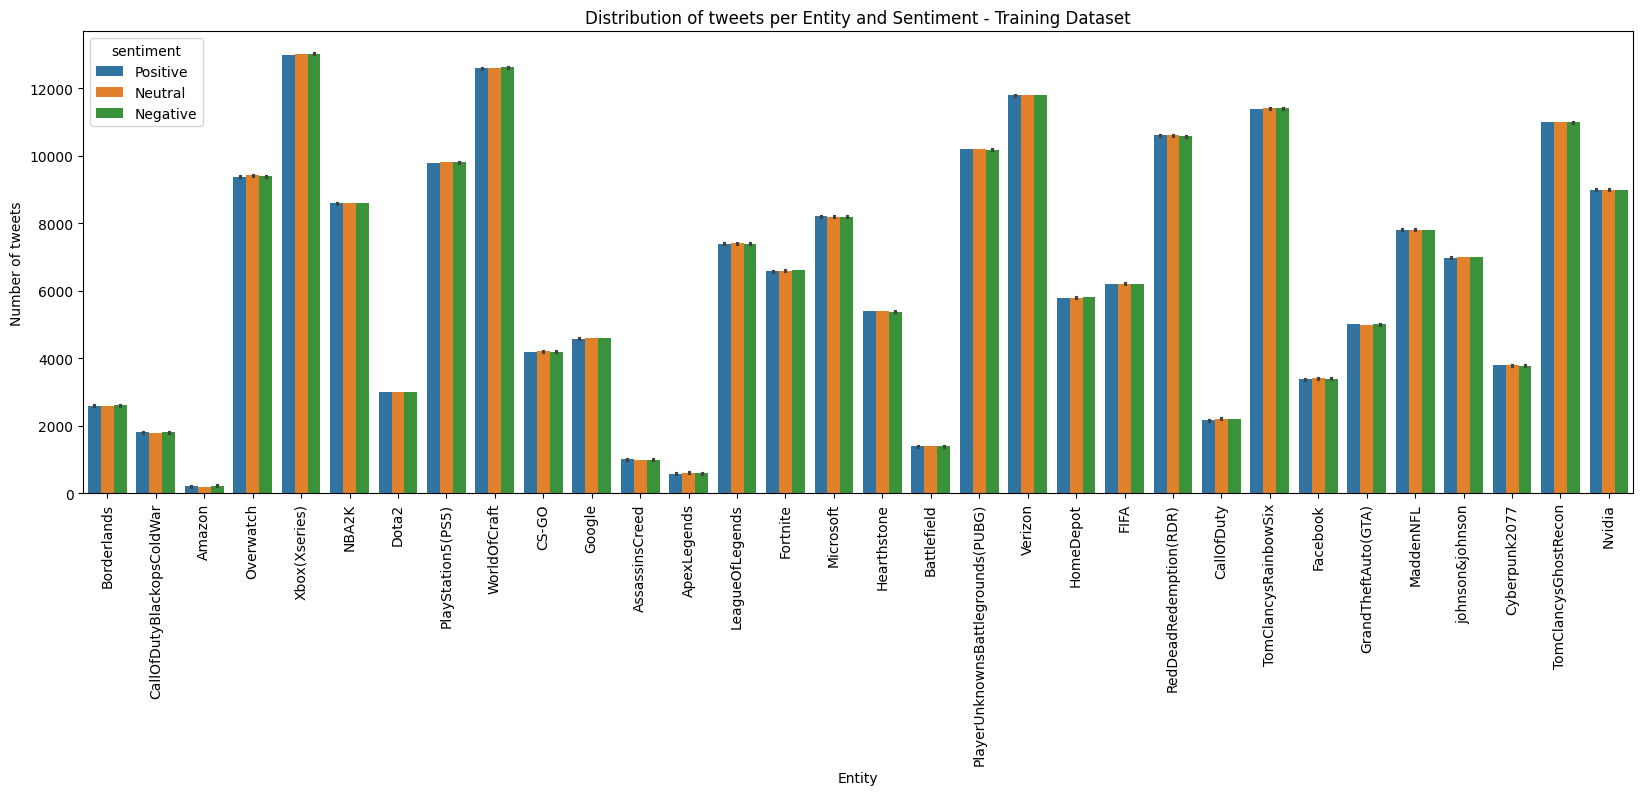

In [148]:
# Tweet distribution per entity and sentiment
plt.figure(figsize=(20,6))

sns.barplot(data=data_train,x="entity",y="Tweet_ID",hue='sentiment')

plt.title("Distribution of tweets per Entity and Sentiment - Training Dataset")
plt.xlabel("Entity")
plt.ylabel("Number of tweets")
plt.xticks(rotation=90)

plt.show()

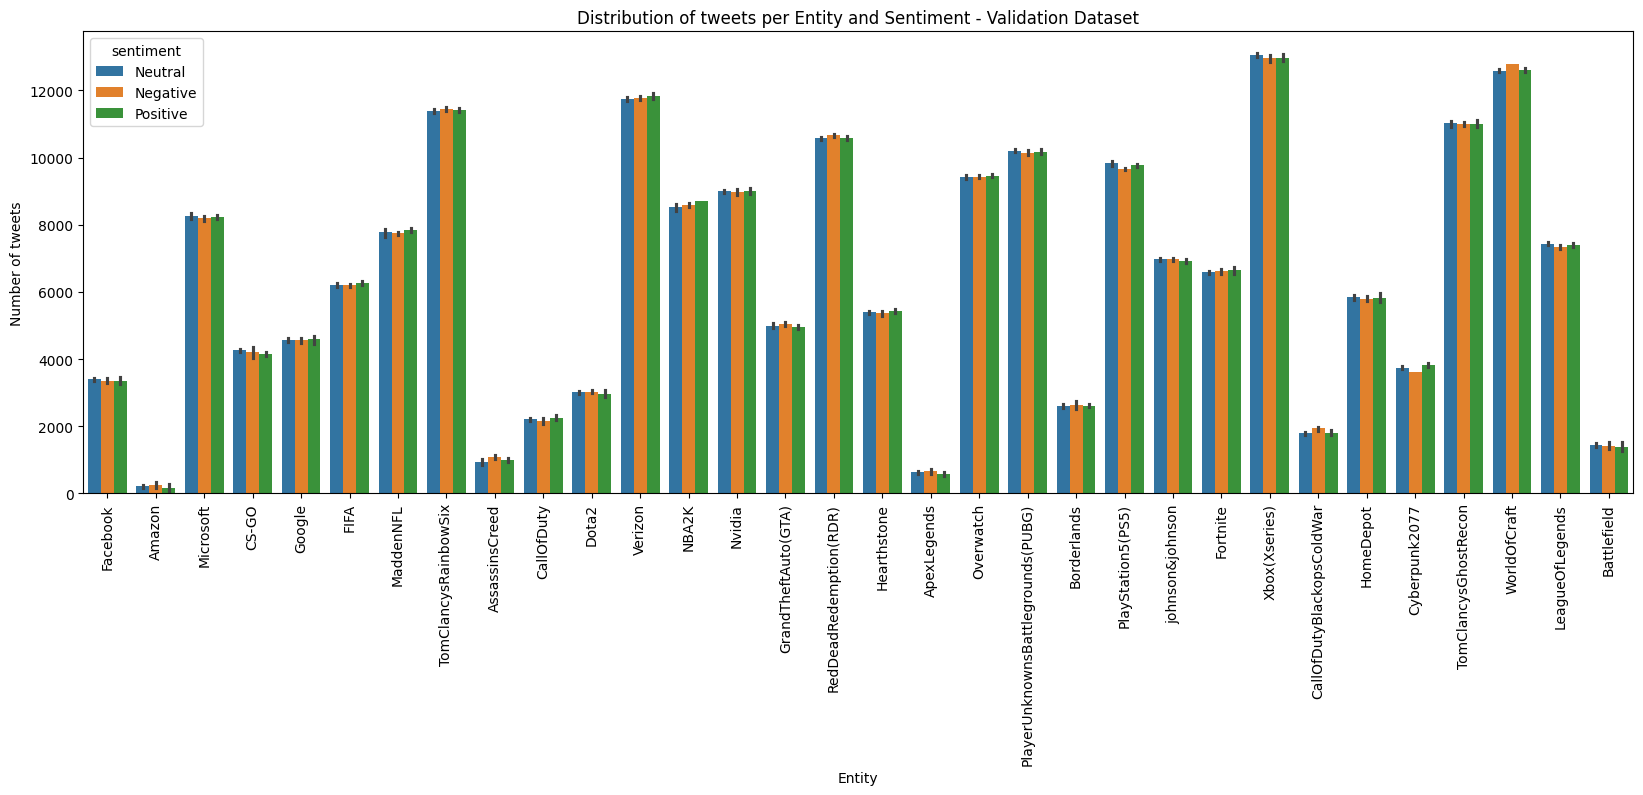

In [149]:
# Tweet distribution per entity and sentiment
plt.figure(figsize=(20,6))

sns.barplot(data=data_valid,x="entity",y="Tweet_ID",hue='sentiment')

plt.title("Distribution of tweets per Entity and Sentiment - Validation Dataset")
plt.xlabel("Entity")
plt.ylabel("Number of tweets")
plt.xticks(rotation=90)

plt.show()

#### Word Cloud visualization

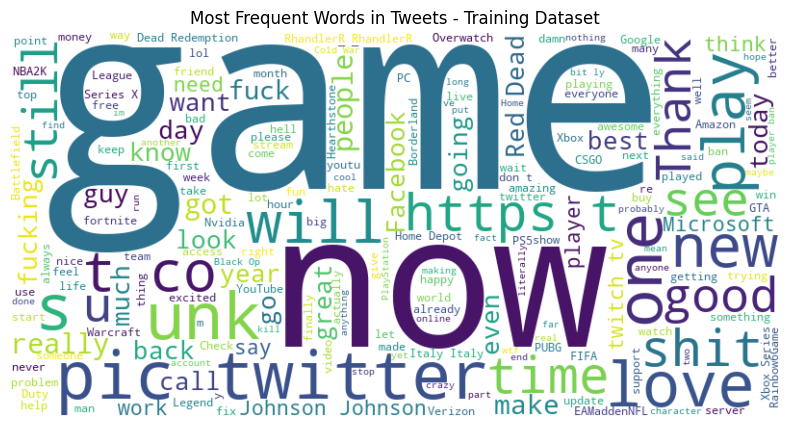

In [150]:
# Most Frequent Words (WordCloud) - Training and Validation Dataset

import wordcloud
from wordcloud import WordCloud

# Combine all tweets into one string
all_words_train = ' '.join(data_train['Tweet_content'])
all_words_valid = ' '.join(data_valid['Tweet_content'])

# Generate WordCloud
wordcloud_train = WordCloud(width=800, height=400, background_color="white").generate(all_words_train)
wordcloud_valid = WordCloud(width=800, height=400, background_color="white").generate(all_words_valid)

# Display WordCloud - Training Dataset
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_train, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Tweets - Training Dataset")
plt.show()


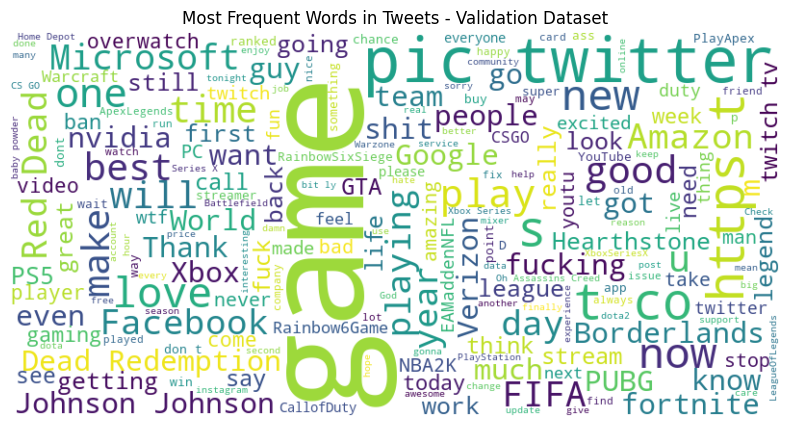

In [151]:
# Display WordCloud - Validation Dataset
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_valid, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Tweets - Validation Dataset")
plt.show()


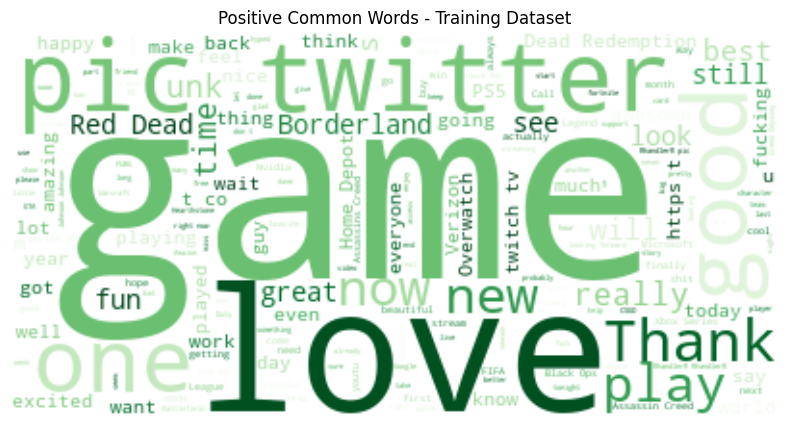

In [152]:
# Wordcloud positive
# "Positive" filter
positive_comments_train = data_train[data_train["sentiment"] == "Positive"]["Tweet_content"]
positive_comments_valid = data_valid[data_valid["sentiment"] == "Positive"]["Tweet_content"]

# Combine positive tweets into one string
text_positive_train = ''.join(i for i in positive_comments_train)
text_positive_valid = ''.join(i for i in positive_comments_valid)

cool_green_palette = ['#4CAF50', '#66BB6A', '#81C784', '#A5D6A7', '#C8E6C9']

# Generate WordCloud
positive_wordcloud_train = WordCloud(background_color="white", colormap="Greens").generate(text_positive_train)
positive_wordcloud_valid = WordCloud(background_color="white", colormap="Greens").generate(text_positive_valid)

# Display WordCloud
plt.figure(figsize=(10,5))
plt.imshow(positive_wordcloud_train, interpolation="bilinear")
plt.title("Positive Common Words - Training Dataset")
plt.axis("off")
plt.show()



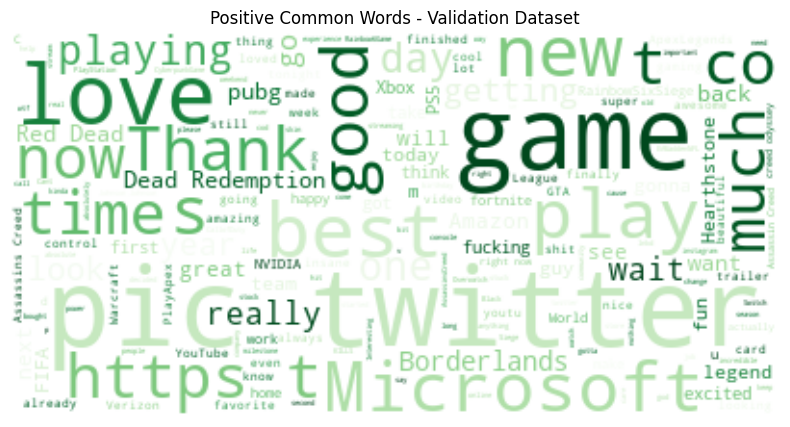

In [153]:
# Display WordCloud
plt.figure(figsize=(10,5))
plt.imshow(positive_wordcloud_valid, interpolation="bilinear")
plt.title("Positive Common Words - Validation Dataset")
plt.axis("off")
plt.show()

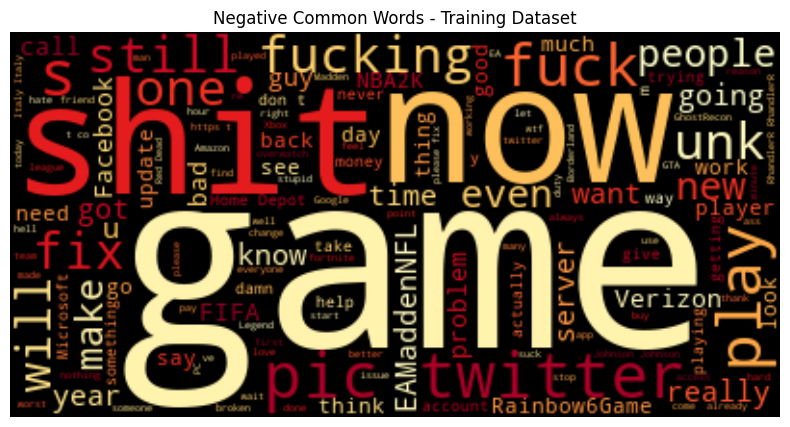

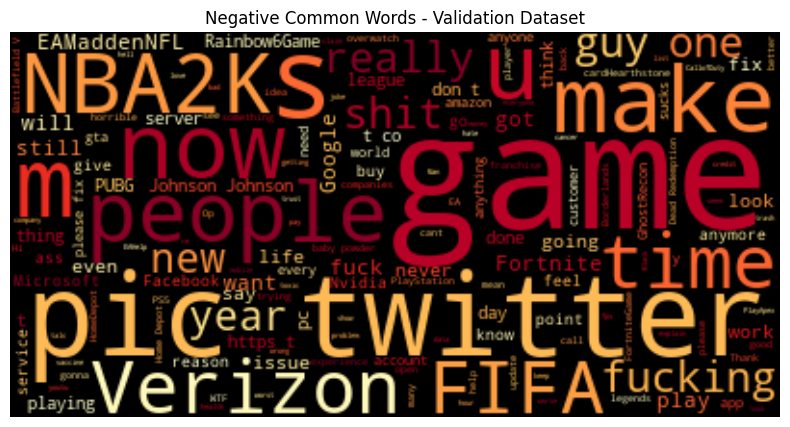

In [154]:
# Wordcloud negative
# "Negative" filter
negative_comments_train = data_train[data_train["sentiment"] == "Negative"]["Tweet_content"]
negative_comments_valid = data_valid[data_valid["sentiment"] == "Negative"]["Tweet_content"]

# Combine negative tweets into one string
text_negative_train = ''.join(i for i in negative_comments_train)
text_negative_valid = ''.join(i for i in negative_comments_valid)

# Generate WordCloud
negative_wordcloud_train = WordCloud(background_color="black", colormap="YlOrRd").generate(text_negative_train) # YlOrRd/ hot
negative_wordcloud_valid = WordCloud(background_color="black", colormap="YlOrRd").generate(text_negative_valid) # YlOrRd/ hot

# Display WordCloud - Training Dataset
plt.figure(figsize=(10,5))
plt.imshow(negative_wordcloud_train, interpolation="bilinear")
plt.title("Negative Common Words - Training Dataset")
plt.axis("off")


# Display WordCloud - Validation Dataset
plt.figure(figsize=(10,5))
plt.imshow(negative_wordcloud_valid, interpolation="bilinear")
plt.title("Negative Common Words - Validation Dataset")
plt.axis("off")
plt.show()

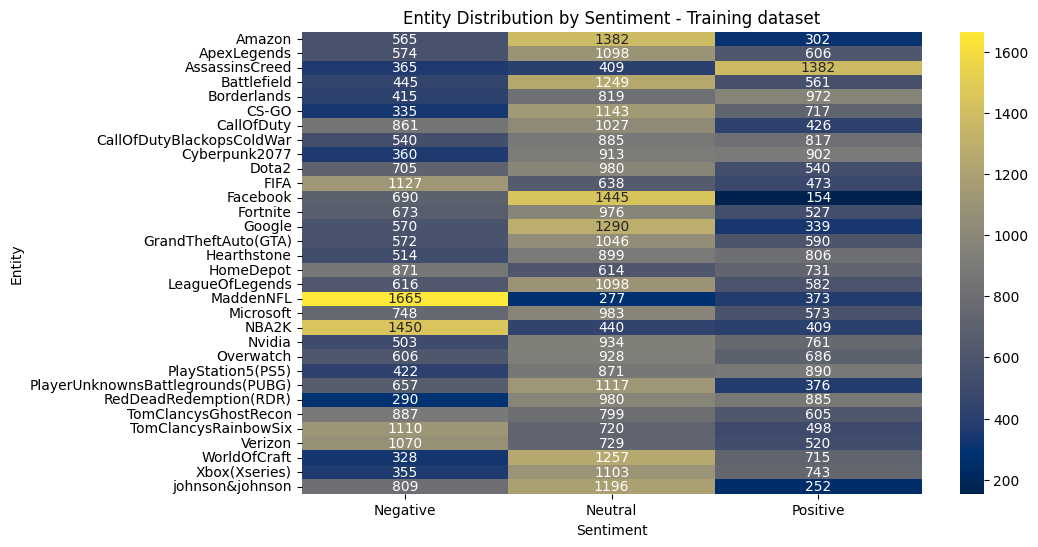

In [155]:
entity_sentiment = data_train.groupby(['entity', 'sentiment']).size().unstack()

# Plot entity vs. sentiment heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(entity_sentiment.fillna(0), cmap="cividis", annot=True, fmt=".0f")
plt.xlabel("Sentiment")
plt.ylabel("Entity")
plt.title("Entity Distribution by Sentiment - Training dataset")
plt.show()

### Step 3 - Text Preprocessing - "Tweet_content" Column

In [156]:
import re
import string
import nltk
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords 
# nltk.download('stopwords') # since, it's downloaded, commented out to ignore warning 
stop_words = set(stopwords.words('english'))

# Ensure necessary NLTK resources are available
# nltk.download('wordnet')  # For Lemmatization

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

def Text_preprocessing(text):

    text = text.strip() # Remove whitespaces

    text = emoji.replace_emoji(text, replace='')  # Remove emojis  
    
    text = text.lower() # convert text to lowercase
    text = re.sub(r"http\S+|www\S+", "", text) # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"#\w+", "", text)  # Remove hashtags
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Keep only letters and spaces

    # Tokenize, remove stopwords, and lemmatize
    text = " ".join(
        [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    )
    text = text.strip() # Remove additional whitespaces

    return text

data_train['cleaned_content'] = data_train['Tweet_content'].astype(str).apply(Text_preprocessing)
data_valid['cleaned_content'] = data_valid['Tweet_content'].astype(str).apply(Text_preprocessing)
    
data_train.head()

,Tweet_ID,entity,sentiment,Tweet_content,cleaned_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderland murder


In [157]:
data_valid.head()

,Tweet_ID,entity,sentiment,Tweet_content,cleaned_content
0,3364,Facebook,Neutral,I mentioned on Facebook that I was struggling ...,mentioned facebook struggling motivation go ru...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon bos jeff bezos reject claim co...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,pay word function poorly chromebook
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
4,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping american face really commit...


### Encode Sentiment Labels

In [158]:
print("Sentiment Before encoding: Training data\n\n", data_train['sentiment'].value_counts())
print("\n\nSentiment Before encoding: Validation data\n\n", data_valid['sentiment'].value_counts())

# Label Encoding Sentiment column
encoder = LabelEncoder()

data_train['sentiment'] = encoder.fit_transform(data_train['sentiment'])
data_valid['sentiment'] = encoder.fit_transform(data_valid['sentiment'])

print("\n\nSentiment After encoding: Training Data\n\n", data_train['sentiment'].value_counts())
print("\n\nSentiment After encoding: Validation Data\n\n", data_valid['sentiment'].value_counts())


Sentiment Before encoding: Training data

 sentiment
Neutral     30245
Negative    21698
Positive    19713
Name: count, dtype: int64


Sentiment Before encoding: Validation data

 sentiment
Neutral     457
Positive    277
Negative    266
Name: count, dtype: int64


Sentiment After encoding: Training Data

 sentiment
1    30245
0    21698
2    19713
Name: count, dtype: int64


Sentiment After encoding: Validation Data

 sentiment
1    457
2    277
0    266
Name: count, dtype: int64


##### After Label Encoding Sentiment column -
* Negative -> 0
* Positive -> 2
* Neutral -> 1

### Text Vectorization (Convert Text to Numbers) - TF-IDF (Term Frequency-Inverse Document Frequency)

In [159]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=10000)  # Convert text to TF-IDF features

# Fit and transform the training data and transform the validation data
X_train = vectorizer.fit_transform(data_train['cleaned_content'])
X_valid = vectorizer.transform(data_valid['cleaned_content'])

y_train = data_train['sentiment']
y_valid = data_valid['sentiment']


print("X_train Data shape: ", X_train.shape)
print("y_train Data Shape: ", y_train.shape)
print("\n")
print("X_valid Data shape: ", X_valid.shape)
print("y_valid Data shape: ", y_valid.shape)

X_train Data shape:  (71656, 10000)
y_train Data Shape:  (71656,)


X_valid Data shape:  (1000, 10000)
y_valid Data shape:  (1000,)


## Build a Model

* Naïve Bayes
* Logistic Regression
* SVM
* Random Forest 

In [160]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_valid)

print("Naïve Bayes Accuracy:", accuracy_score(y_valid, y_pred_nb))
print(classification_report(y_valid, y_pred_nb))


Naïve Bayes Accuracy: 0.807
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       266
           1       0.82      0.82      0.82       457
           2       0.82      0.78      0.80       277

    accuracy                           0.81      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.81      0.81      0.81      1000



In [161]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_valid)

print("Logistic Regression Accuracy:", accuracy_score(y_valid, y_pred_lr))
print(classification_report(y_valid, y_pred_lr))


Logistic Regression Accuracy: 0.862
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       266
           1       0.87      0.88      0.87       457
           2       0.87      0.84      0.85       277

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



In [66]:
from sklearn.svm import SVC # runtime = 300 secs

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_valid)

print("SVM Accuracy:", accuracy_score(y_valid, y_pred_svm))
print(classification_report(y_valid, y_pred_svm))


SVM Accuracy: 0.881
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       266
           1       0.89      0.90      0.89       457
           2       0.90      0.86      0.88       277

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



In [162]:
from sklearn.ensemble import RandomForestClassifier # runtime = 60 secs

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_valid)

print("Random Forest Accuracy:", accuracy_score(y_valid, y_pred_rf))
print(classification_report(y_valid, y_pred_rf))


Random Forest Accuracy: 0.972
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       266
           1       0.97      0.98      0.97       457
           2       0.98      0.97      0.97       277

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



### Model Performance 

#### Random Forest has highest accuracy attaining ~97%

The Random Forest model demonstrates the highest accuracy and overall performance, followed by SVM and Logistic Regression, while Naïve Bayes exhibits relatively lower accuracy. These results indicate that ensemble methods like Random Forest are highly effective for sentiment classification in this dataset. 

#### Visualize Actual Vs Predicted data

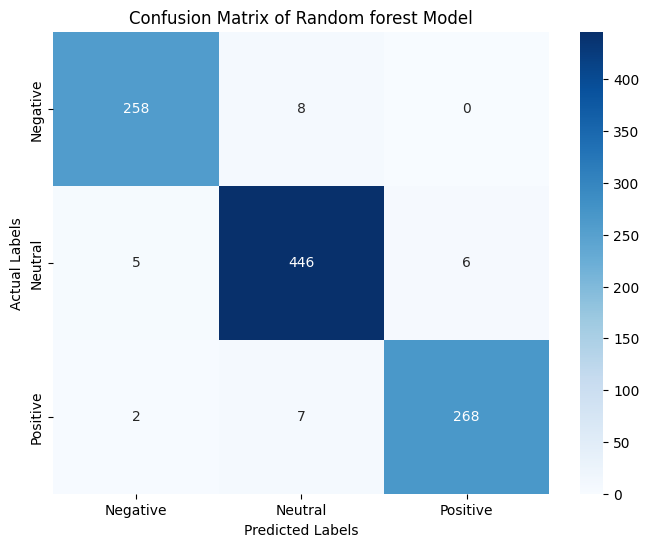

In [163]:
# Generate confusion matrix - Random forest
cm = confusion_matrix(y_valid, y_pred_rf)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])

# Add labels and title
plt.title('Confusion Matrix of Random forest Model')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


#### Conclusion:

The model performs well with high accuracy and minimal misclassification. It correctly identifies most Negative, Neutral, and Positive labels, though it slightly struggles with Neutral samples, sometimes confusing them with Negative or Positive.
